<a href="https://colab.research.google.com/github/MalekYasser26/AdultIncomeDataSet/blob/main/AdultIncome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving adult.csv to adult.csv


In [2]:
import seaborn as sns
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
df = pd.DataFrame(data)
df.isnull()
# df.replace('?', pd.NA, inplace=True)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
print(df['relationship'])

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 48842, dtype: object


In [4]:
# Create boolean series
non_white = (df['race'] != 'White')
white = (df['race'] == 'White')
male =  (df['gender'] == 'Male')
female = (df['gender'] == 'Female')
inUS = (df['native-country']==' United-States')
notinUS = (df['native-country']!=' United-States')
inRelationship=(df['marital-status']=='Married-civ-spouse') | (df['marital-status']=='Married-civ-spouse') | (df['marital-status']=='Married-AF-spouse') | (df['marital-status']=='Married-spouse-absent')
notInRelationship = ~inRelationship

print(inRelationship)
print("++++++++")
print(notInRelationship)
# Filter white and non-white males and females
white_males = df[(white) & (male)]
white_females = df[(white) & (female)]
non_white_males = df[(non_white) &(male)]
non_white_females = df[(non_white) & (female)]
# Calculate counts for white
white_males_over_50k = len(white_males[white_males['income'] == '>50K'])
white_males_under_50k = len(white_males[white_males['income'] == '<=50K'])
white_females_over_50k = len(white_females[white_females['income'] == '>50K'])
white_females_under_50k = len(white_females[white_females['income'] == '<=50K'])
# Calculate counts for non-white
non_white_males_over_50k = len(non_white_males[non_white_males['income'] == '>50K'])
non_white_males_under_50k = len(non_white_males[non_white_males['income'] == '<=50K'])
non_white_females_over_50k = len(non_white_females[non_white_females['income'] == '>50K'])
non_white_females_under_50k = len(non_white_females[non_white_females['income'] == '<=50K'])

# Calculate the total number of individuals in the dataset
total_individuals = len(df)

# Calculate the number of white and non-white individuals
total_white_individuals = sum(white)
total_non_white_individuals = sum(non_white)

0        False
1         True
2         True
3         True
4        False
         ...  
48837     True
48838     True
48839    False
48840    False
48841     True
Name: marital-status, Length: 48842, dtype: bool
++++++++
0         True
1        False
2        False
3        False
4         True
         ...  
48837    False
48838    False
48839     True
48840     True
48841    False
Name: marital-status, Length: 48842, dtype: bool


Percentage of white people in the dataset:  85.5042791040498
Percentage of non-white people in the dataset:  14.495720895950207
Percentage of white males with income >50K: 18.56%
Percentage of white males with income <=50K: 40.27%
Percentage of white females with income >50K: 3.16%
Percentage of white females with income <=50K: 23.51%
Percentage of non-white males with income >50K: 1.75%
Percentage of non-white males with income <=50K: 6.27%
Percentage of non-white females with income >50K: 0.46%
Percentage of non-white females with income <=50K: 6.02%


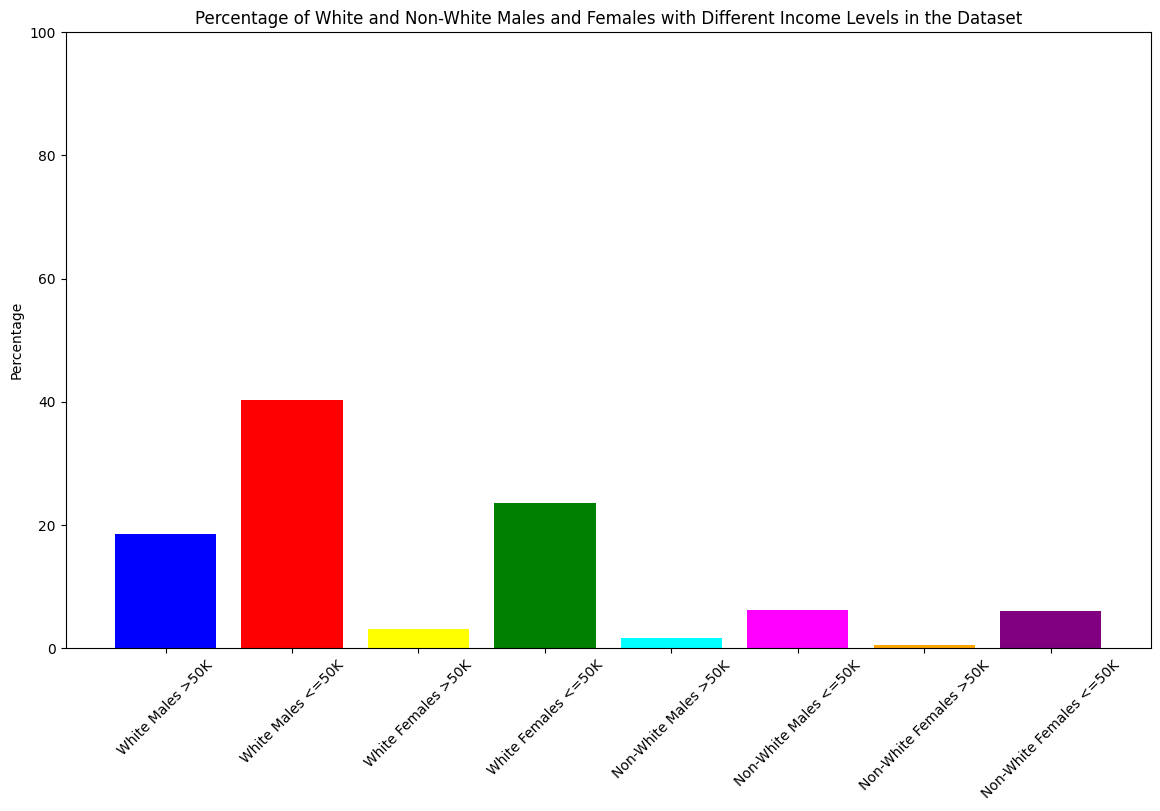

In [5]:
# Calculate percentages of white and non-white individuals
non_white_percent = (total_non_white_individuals / total_individuals) * 100
white_percent = (total_white_individuals / total_individuals) * 100

print("Percentage of white people in the dataset: ", white_percent)
print("Percentage of non-white people in the dataset: ", non_white_percent)

# Calculate the percentages of income levels for white males and females
percentageOverMales = (white_males_over_50k / total_individuals) * 100
percentageUnderMales = (white_males_under_50k / total_individuals) * 100
percentageOverFemales = (white_females_over_50k / total_individuals) * 100
percentageUnderFemales = (white_females_under_50k / total_individuals) * 100

print(f"Percentage of white males with income >50K: {percentageOverMales:.2f}%")
print(f"Percentage of white males with income <=50K: {percentageUnderMales:.2f}%")
print(f"Percentage of white females with income >50K: {percentageOverFemales:.2f}%")
print(f"Percentage of white females with income <=50K: {percentageUnderFemales:.2f}%")

# Calculate the percentages of income levels for non-white males and females
non_percentageOverMales = (non_white_males_over_50k / total_individuals) * 100
non_percentageUnderMales = (non_white_males_under_50k / total_individuals) * 100
non_percentageOverFemales = (non_white_females_over_50k / total_individuals) * 100
non_percentageUnderFemales = (non_white_females_under_50k / total_individuals) * 100

print(f"Percentage of non-white males with income >50K: {non_percentageOverMales:.2f}%")
print(f"Percentage of non-white males with income <=50K: {non_percentageUnderMales:.2f}%")
print(f"Percentage of non-white females with income >50K: {non_percentageOverFemales:.2f}%")
print(f"Percentage of non-white females with income <=50K: {non_percentageUnderFemales:.2f}%")

# Plot the results
labels = [
    'White Males >50K', 'White Males <=50K', 'White Females >50K', 'White Females <=50K',
    'Non-White Males >50K', 'Non-White Males <=50K', 'Non-White Females >50K', 'Non-White Females <=50K'
]
percentages = [
    percentageOverMales, percentageUnderMales, percentageOverFemales, percentageUnderFemales,
    non_percentageOverMales, non_percentageUnderMales, non_percentageOverFemales, non_percentageUnderFemales
]
colors = ['blue', 'red', 'yellow', 'green', 'cyan', 'magenta', 'orange', 'purple']

plt.figure(figsize=(14, 8))
plt.bar(labels, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Percentage of White and Non-White Males and Females with Different Income Levels in the Dataset')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()


[21.7063359034529, 47.10023466309085, 3.6923518988554185, 27.50107753460083, 12.048022598870055, 43.24858757062147, 3.2062146892655368, 41.497175141242934]


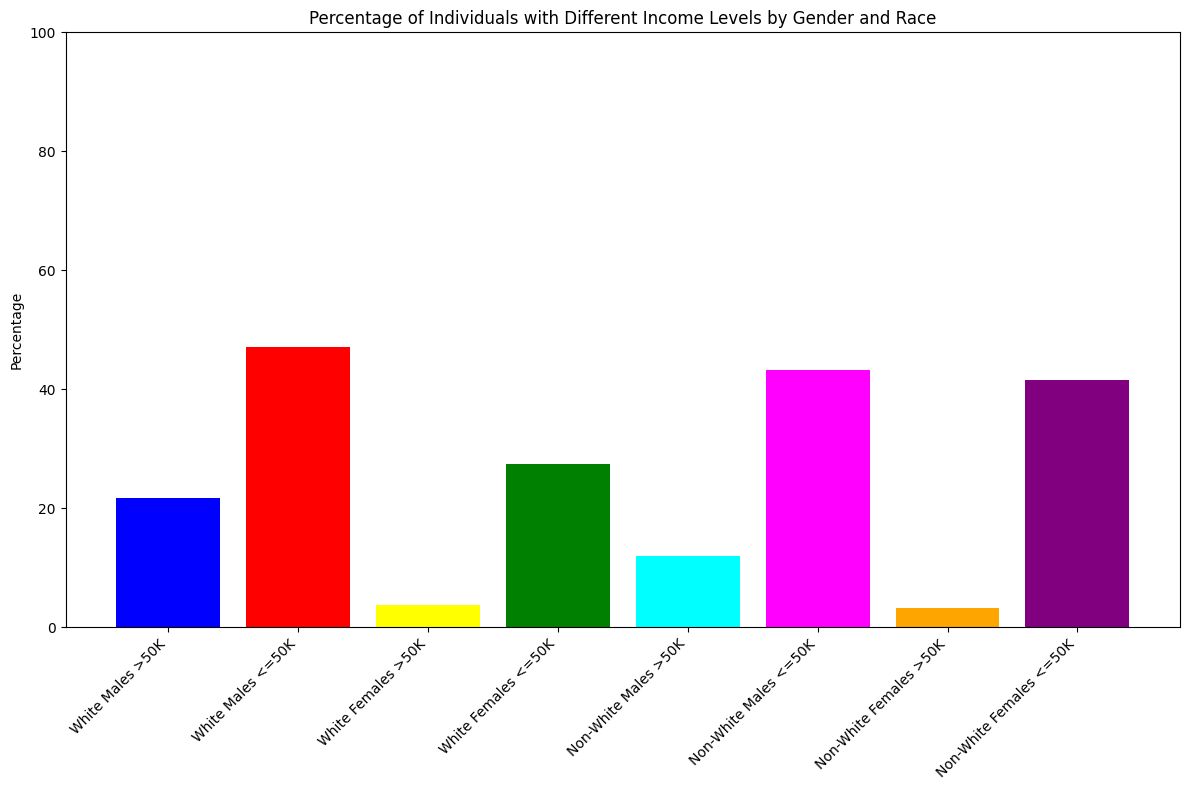

In [6]:

# Calculate the percentages within each group
percentageOver_white_males = (white_males_over_50k / total_white_individuals) * 100
percentageUnder_white_males = (white_males_under_50k / total_white_individuals) * 100
percentageOver_white_females = (white_females_over_50k / total_white_individuals) * 100
percentageUnder_white_females = (white_females_under_50k / total_white_individuals) * 100

percentageOver_non_white_males = (non_white_males_over_50k / total_non_white_individuals) * 100
percentageUnder_non_white_males = (non_white_males_under_50k / total_non_white_individuals) * 100
percentageOver_non_white_females = (non_white_females_over_50k / total_non_white_individuals) * 100
percentageUnder_non_white_females = (non_white_females_under_50k / total_non_white_individuals) * 100

# Plot the results
labels = ['White Males >50K', 'White Males <=50K', 'White Females >50K', 'White Females <=50K',
          'Non-White Males >50K', 'Non-White Males <=50K', 'Non-White Females >50K', 'Non-White Females <=50K']
percentages = [
    percentageOver_white_males, percentageUnder_white_males, percentageOver_white_females, percentageUnder_white_females,
    percentageOver_non_white_males, percentageUnder_non_white_males, percentageOver_non_white_females, percentageUnder_non_white_females
]
colors = ['blue', 'red', 'yellow', 'green', 'cyan', 'magenta', 'orange', 'purple']
print(percentages)
plt.figure(figsize=(12, 8))
plt.bar(labels, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Percentage of Individuals with Different Income Levels by Gender and Race')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Number of individuals in US: 43832
Number of individuals not in US: 5010


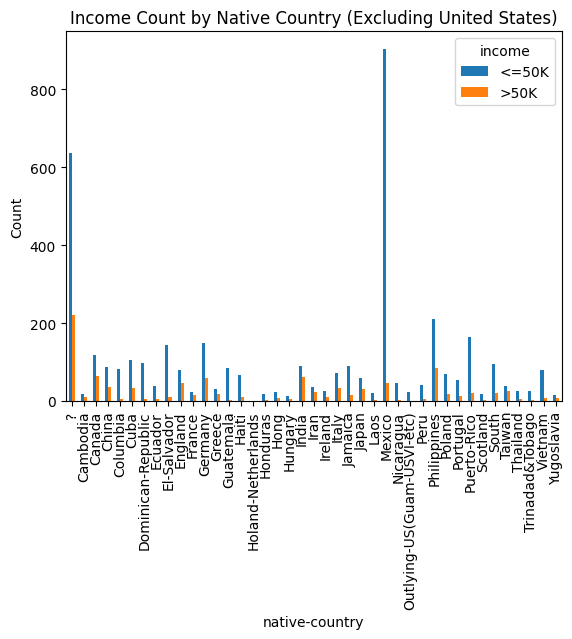

<Figure size 5000x5000 with 0 Axes>

In [11]:
inUS = (df['native-country'] == 'United-States')
notInUS = (df['native-country'] != 'United-States')
length_inUS = len(df[inUS])
length_notInUS = len(df[notInUS])

print("Number of individuals in US:", length_inUS)
print("Number of individuals not in US:", length_notInUS)

# Filter out United States
df_excluding_us = df[df['native-country'] != 'United-States']

# Create a grouped bar plot for income counts by native country excluding United States
grouped_excluding_us = df_excluding_us.groupby(['native-country', 'income']).size().unstack(fill_value=0)
grouped_excluding_us.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Income Count by Native Country (Excluding United States)')
plt.figure(figsize=(50, 50))
plt.show()

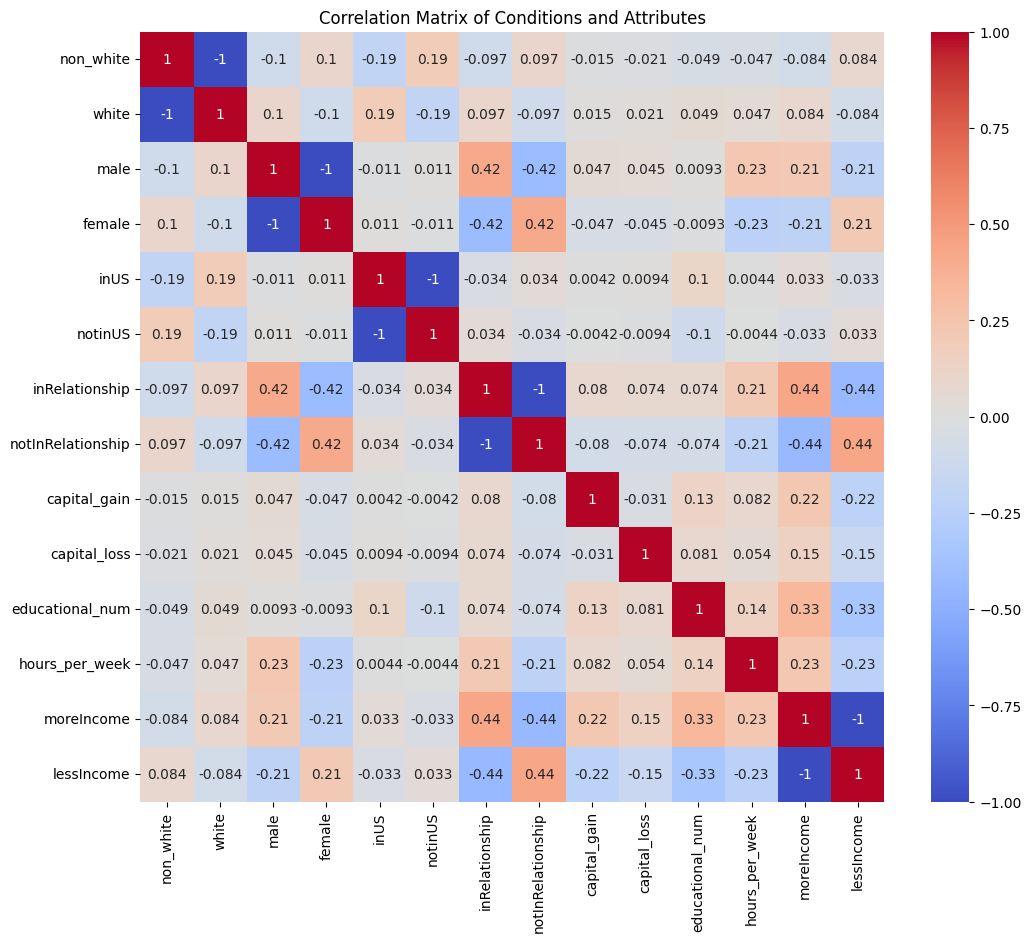

In [8]:
non_white = (df['race'] != 'White')
white = (df['race'] == 'White')
male = (df['gender'] == 'Male')
female = (df['gender'] == 'Female')
inUS = (df['native-country'] == 'United-States')
notinUS = (df['native-country'] != 'United-States')
inRelationship = (df['marital-status'].isin(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']))
notInRelationship = ~inRelationship
moreIncome = (df['income']=='>50K')
lessIncome = ~moreIncome
# Additional attributes from the dataset
capital_gain = df['capital-gain']
capital_loss = df['capital-loss']
educational_num = df['educational-num']
hours_per_week = df['hours-per-week']

# Create a new DataFrame with all conditions and attributes
conditions_df = pd.DataFrame({
    'non_white': non_white,
    'white': white,
    'male': male,
    'female': female,
    'inUS': inUS,
    'notinUS': notinUS,
    'inRelationship': inRelationship,
    'notInRelationship': notInRelationship,
    'capital_gain': capital_gain,
    'capital_loss': capital_loss,
    'educational_num': educational_num,
    'hours_per_week': hours_per_week,
    'moreIncome':moreIncome,
    'lessIncome':lessIncome,
})

# Compute the correlation matrix
corr_matrix = conditions_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Conditions and Attributes')
plt.show()